In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Normalization / Standardisation function
from sklearn.preprocessing import StandardScaler  # built in function for standardization
scaler = StandardScaler() # scaler is an object name of StandardScalar class, you can give any name
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:]) # fit_transform() is a method of StandardScalar class
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

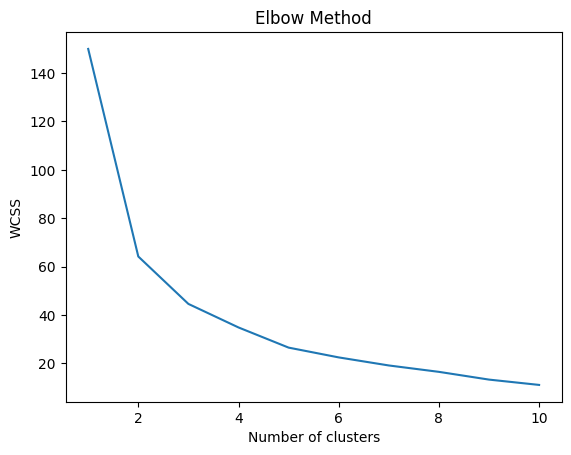

In [ ]:
# Inertia measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance,
# and summing these squares across one cluster.
# A good model is one with low inertia AND a low number of clusters (K).

# To plot the elbow method graph, we need to compute the WCSS (Within Cluster Sum of Squares)
# Let us say max. no. of clusters could be 10.
# As we are going to have 10 iterations we are going to write a for loop to create a list of 10 WCSS for the no. of clusters

wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_Univ_df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,
    # if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#init='k-means++': init is random initialization method. We can choose random if choice of initial centroid is to be random.
# But as we don't want to fall into random initialization, we are going to use this initialization method.
# ‘k-means++’ : selects initial cluster centroids using sampling, based on an empirical probability distribution of the points’.
# It makes several trials at each sampling step and selects the best centroid among them.
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=init%7B'k%2Dmeans%2B%2B,contribution%20to%20the%20overall%20inertia.
# max_iter=300: Suppose dataset has 200 data points. We will make 10 clusters of 20 points each in 1st iteration. Such how many combinations you can form for data points?
# so default value is 300. so we will keep it as it is.
# random_state=0: Use an int to make the randomness deterministic i.e. same results every time. It determines random number generation for centroid initialization.


In [ ]:
wcss

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 34.79612750585773,
 26.45525084643788,
 22.40762746868903,
 19.07426797536871,
 16.431973511580264,
 13.226744772273472,
 11.02525622519605]

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
predict=kmeans.fit_predict(scaled_Univ_df)# assign cluster numbers to universities

In [ ]:
predict

array([3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1,
       1, 0, 3], dtype=int32)

In [ ]:
clusters_new = KMeans(n_clusters=3, random_state=0)
new_predict=clusters_new.fit_predict(scaled_Univ_df)

In [ ]:
clusters_new.labels_

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1], dtype=int32)

In [ ]:
new_predict

array([2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1], dtype=int32)

In [ ]:
#Assign clusters to the data set
#Univ['clusterid_new'] = clusters_new.labels_
Univ['clusterid_new'] = new_predict

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1


In [ ]:
#Univ.groupby('clusterid_new').agg(['mean']).reset_index()
Univ.groupby('clusterid_new').mean('numeric_only')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid_new,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [ ]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
13,PennState,1081,38,54,18,10185,80,0
15,Purdue,1005,28,90,19,9066,69,0
17,TexasA&M,1075,49,67,25,8704,67,0
23,UWisconsin,1085,40,69,15,11857,71,0


In [ ]:
Univ[Univ['clusterid_new']==0].shape[0]

4

In [ ]:
Univ[Univ['clusterid_new']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
7,Georgetown,1255,74,24,12,20126,92,2
11,Northwestern,1260,85,39,11,28052,89,2
12,NotreDame,1255,81,42,13,15122,94,2
18,UCBerkeley,1240,95,40,17,15140,78,2
19,UChicago,1290,75,50,13,38380,87,2
20,UMichigan,1180,65,68,16,15470,85,2


In [ ]:
Univ[Univ['clusterid_new']==2].shape[0]

12